In [1]:
from __future__ import print_function, division
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from netCDF4 import Dataset 
import cartopy.crs as crs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.cm as cm

In [2]:
plt.rcParams["figure.figsize"] = [8,8]
np.set_printoptions(suppress=True)

def read_MHS_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    R1 = nc_fid.variables["channel_1"][:]  # shape lat, lon as shown above
    R2 = nc_fid.variables["channel_2"][:]  # shape lat, lon as shown above
    SZ = nc_fid.variables["satellite_zenith"][:]
    lats = nc_fid.variables['lat'][:]  # extract/copy the data
    lons = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return R1, R2, SZ, lats, lons, names

def read_radar_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    Z = nc_fid.variables["Reflectivity"][:]  # shape lat, lon as shown above
    lat = nc_fid.variables['lat'][:]  # extract/copy the data
    lon = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return Z, lat, lon, names

def read_radar_vel(ncf):
    nc_fid = Dataset(ncf, 'r')
    V = nc_fid.variables["RadialVelocity"][:]  # shape lat, lon as shown above
    lat = nc_fid.variables['lat'][:]  # extract/copy the data
    lon = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return V, lat, lon, names

def make_radar_mask(Z,lat,lon):
    Z[Z>70]=69
    print('Z shape', Z.shape, Z)
    Z_30 = ma.masked_where(Z < 30, Z)
    print('Z_30 shape', Z_30.shape)
    Z_40 = ma.masked_where(Z < 40, Z)
    print('Z_40 shape', Z_40.shape)
    lonz,latz = np.meshgrid(lon,lat)
    print('lats shape, lons shape', latz.shape, lonz.shape, latz,lonz)
    return Z_30, Z_40, lonz, latz

Z_file_LWX = 'KLWX_V06_20120630_020528.nc'
Z_LWX, lat_lwx, lon_lwx, names = read_radar_plot(Z_file_LWX)
Z_LWX = Z_LWX[0,:,:]
Z_LWX = np.nan_to_num(Z_LWX)
print(names)
print('Z_LWX shape', Z_LWX.shape, Z_LWX)
Z_LWX_max = np.amax(Z_LWX)
Z_LWX_min = np.amin(Z_LWX)
print('Z_LWX min, Z_LWX max', Z_LWX_min, Z_LWX_max)
print('lat shape, lon shape', lat_lwx.shape, lon_lwx.shape)

Z_30_LWX, Z_40_LWX, lonz_lwx, latz_lwx = make_radar_mask(Z_LWX, lat_lwx, lon_lwx) 

V_file = 'KLWX_V_cappi_3km_20120630_020528.nc'
V_LWX, lat_lwx, lon_lwx, names = read_radar_vel(V_file)
V_LWX = V_LWX[0,0,:,:]
V_LWX = np.nan_to_num(V_LWX)
print(names)
print('V shape', V_LWX.shape, V_LWX)
V_LWX_max = np.amax(V_LWX)
V_LWX_min = np.amin(V_LWX)
print('V min, V max', V_LWX_min, V_LWX_max)
print('lat shape, lon shape', lat_lwx.shape, lon_lwx.shape)

shape = V_LWX.shape
V_deal_lwx = np.zeros((587,780))
print('V_deal_0s LWX', V_deal_lwx)
V_deal_lwx = V_LWX

for y in range(0, 390):
    for x in range(0, 586):
        if V_LWX[x, y] > 20:
            V_deal_lwx[x, y] = V_LWX_max + (V_LWX_max - V_LWX[x, y])
        else:
            V_deal_lwx[x, y] = V_LWX[x, y]
V_deal_lwx=np.absolute(V_deal_lwx)
print('V_deal shape', V_deal_lwx.shape, V_deal_lwx)
V_deal_lwx_max = np.amax(V_deal_lwx)
V_deal_lwx_min = np.amin(V_deal_lwx)
print('V_deal min, V_deal max', V_deal_lwx_min, V_deal_lwx_max)

V_20_LWX = ma.masked_where(V_deal_lwx < 20, V_deal_lwx)
print('V_20 shape', V_20_LWX.shape)
lonv_lwx,latv_lwx = np.meshgrid(lon_lwx,lat_lwx)
print('lats shape, lons shape', latv_lwx.shape, lonv_lwx.shape, latv_lwx, lonv_lwx)

MHS_file = 'W_XX-EUMETSAT-Darmstadt,SOUNDING+SATELLITE,METOPA+MHS_C_EUMP_20120630020055_29555_eps_o_l1.nc'
R1, R2, SZ, lats, lons, names = read_MHS_plot(MHS_file)
SZ_5 = ma.masked_where(SZ > 5.0, SZ)
print('SZ_5 shape', SZ_5.shape)
R1_kw = R1 * 1000
R1_kwmn = np.mean(R1_kw)
R2_kw = R2 * 1000
R2_kwmn = np.mean(R2_kw)
lats_mn = np.mean(lats)
lons_mn = np.mean(lons)
print("R1 mean = ", R1_kwmn)
print("R2 mean = ", R1_kwmn)
print("Lats mean= ", lats_mn)
print("Lons mean= ", lons_mn)
R1_max = np.amax(R1_kw) 
R1_min = np.amin(R1_kw)
print("R1 max =", R1_max)
print("R1 min =", R1_min)
print("R1 = ", R1_kw, R1_kw.shape)
R2_max = np.amax(R2_kw)
R2_min = np.amin(R2_kw)
print("R2 max =", R2_max)
print("R2 min =", R2_min)
print("R2 = ", R2_kw, R2_kw.shape)
print("Lats = ", lats, lats.shape)
print("Lons = ", lons, lons.shape)


/tmp/ipykernel_848/1905397747.py:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Z = nc_fid.variables["Reflectivity"][:]  # shape lat, lon as shown above
/tmp/ipykernel_848/1905397747.py:18: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_fid.variables['lat'][:]  # extract/copy the data
/tmp/ipykernel_848/1905397747.py:19: DeprecationWarni

dict_keys(['Reflectivity', 'lat', 'lon', 'time'])
Z_LWX shape (673, 1122) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Z_LWX min, Z_LWX max -17.0 63.0
lat shape, lon shape (673,) (1122,)
Z shape (673, 1122) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Z_30 shape (673, 1122)
Z_40 shape (673, 1122)
lats shape, lons shape (673, 1122) (673, 1122) [[36.41346255 36.41346255 36.41346255 ... 36.41346255 36.41346255
  36.41346255]
 [36.42097364 36.42097364 36.42097364 ... 36.42097364 36.42097364
  36.42097364]
 [36.42848474 36.42848474 36.42848474 ... 36.42848474 36.42848474
  36.42848474]
 ...
 [41.44589658 41.44589658 41.44589658 ... 41.44589658 41.44589658
  41.44589658]
 [41.45340767 41.45340767 41.45340767 ... 41.45340767 41.45340767
  41.45340767]
 [41.46091877 41.460918

V_deal shape (587, 780) [[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]]
V_deal min, V_deal max 0.0 78.7257022857666
V_20 shape (587, 780)
lats shape, lons shape (587, 780) (587, 780) [[36.73915911 36.73915911 36.73915911 ... 36.73915911 36.73915911
  36.73915911]
 [36.74666216 36.74666216 36.74666216 ... 36.74666216 36.74666216
  36.74666216]
 [36.75416521 36.75416521 36.75416521 ... 36.75416521 36.75416521
  36.75416521]
 ...
 [41.12094134 41.12094134 41.12094134 ... 41.12094134 41.12094134
  41.12094134]
 [41.12844439 41.12844439 41.12844439 ... 41.12844439 41.12844439
  41.12844439]
 [41.13594744 41.13594744 41.13594744 ... 41.13594744 41.13594744
  41.13594744]] [[-80.41370019 -80.40619714 -80.39869408 ... -74.58382897 -74.57632592
  -74.56882286]
 [-80.41370019 -80.40619714 -80.39869408 ... -74.58382897 -74.57632592
  -74.56882286]
 [-80.4

/tmp/ipykernel_848/1905397747.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  R1 = nc_fid.variables["channel_1"][:]  # shape lat, lon as shown above
/tmp/ipykernel_848/1905397747.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  R2 = nc_fid.variables["channel_2"][:]  # shape lat, lon as shown above
/tmp/ipykernel_848/1905397747.py:8: Deprecat

In [3]:
C1 = .00001191
C2 = 1.439
f1 = 8900000000
f2 = 15700000000
c = 29979245800
sigma1 = f1/c
sigma2 = f2/c
print("sigma 1 = ", sigma1)
print("sigma 2 = ", sigma2)
BT1 = (C2*sigma1)/(np.log(1+((C1*(sigma1**3))/R1)))
BT1 = BT1/100
BT1mn = np.mean(BT1)
print("BT1 mean = ", BT1mn)
BT1_max = np.amax(BT1)
BT1_min = np.amin(BT1)
print("BT1 max =", BT1_max)
print("BT1 min =", BT1_min)
print("BT1 = ", BT1, BT1.shape)
BT2 = (C2*sigma2)/(np.log(1+((C1*(sigma2**3))/R2)))
BT2 = BT2/100
BT2mn = np.mean(BT2)
print("BT2 mean = ", BT2mn)
BT2_max = np.amax(BT2)
BT2_min = np.amin(BT2)
print("BT2 max =", BT2_max)
print("BT2 min =", BT2_min)
print("BT2 = ", BT2, BT2.shape)
BTD = BT1 - BT2
BTD_max = np.amax(BTD)
BTD_min = np.amin(BTD)
print("BTD max =", BTD_max)
print("BTD min =", BTD_min)
print("BTD = ", BTD, BTD.shape)


sigma 1 =  0.2968720447263553
sigma 2 =  0.5236956294610987
BT1 mean =  257.08557259565873
BT1 max = 290.9828916634476
BT1 min = 114.08280190142288
BT1 =  [[263.65370732032056 259.71095667370525 258.79518565955533 ...
  264.5352054657098 262.68995429423353 262.81196570076344]
 [263.30275316137084 260.44028328759237 261.66862285074365 ...
  265.9952296113026 263.67152921340886 264.0005487390305]
 [263.7428167782548 260.9804236774162 266.9562408102913 ...
  266.63544677423613 264.95333444668114 263.94297032089884]
 ...
 [278.2553196842654 278.4636987183072 271.70508929727333 ...
  273.5709041869324 272.49747798819476 273.13769514627467]
 [276.12766008607525 275.6286471388668 252.2764863110985 ...
  273.7546067560932 273.0609239237597 272.30143718761974]
 [275.2667256587148 275.37091517776577 262.5460082505855 ...
  274.4428059335495 272.9032687361104 271.6187216696768]] (143, 90)
BT2 mean =  276.9533981156427
BT2 max = 292.68262237973175
BT2 min = 106.06122230060815
BT2 =  [[282.78708094

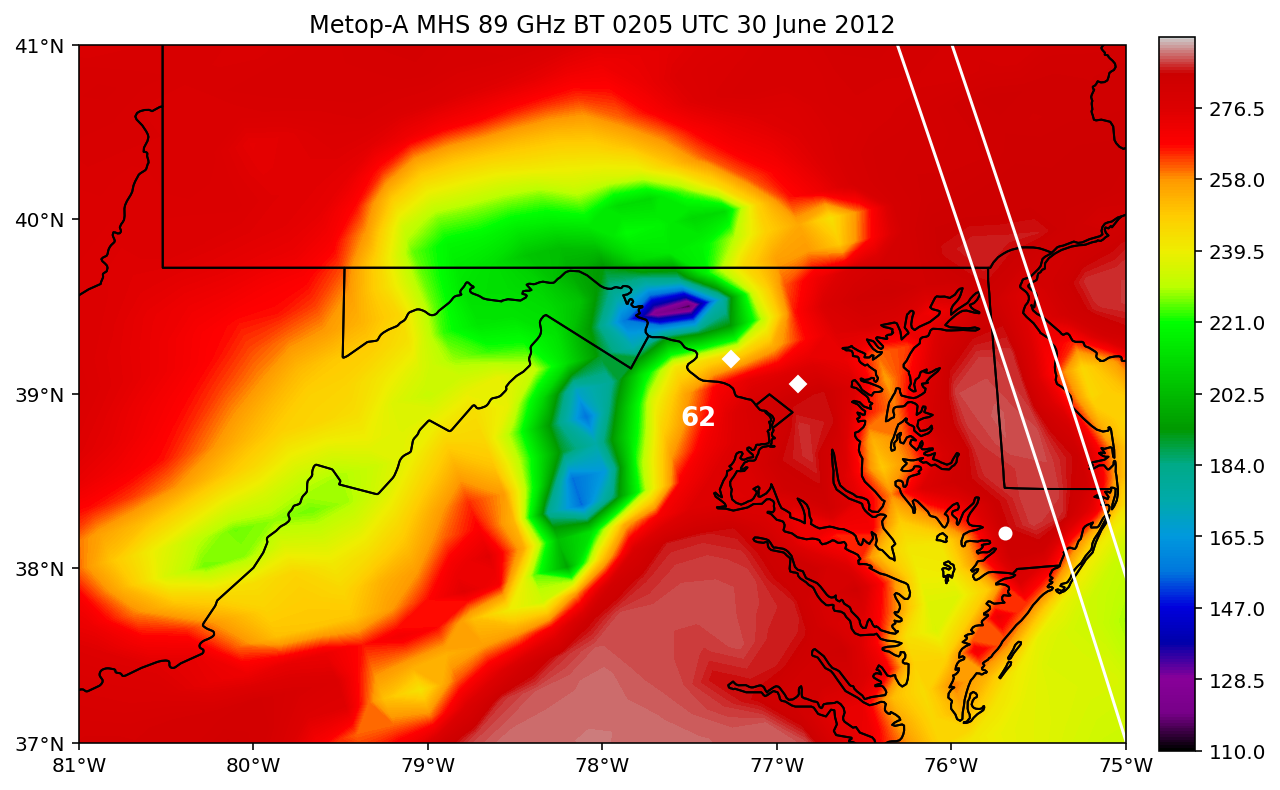

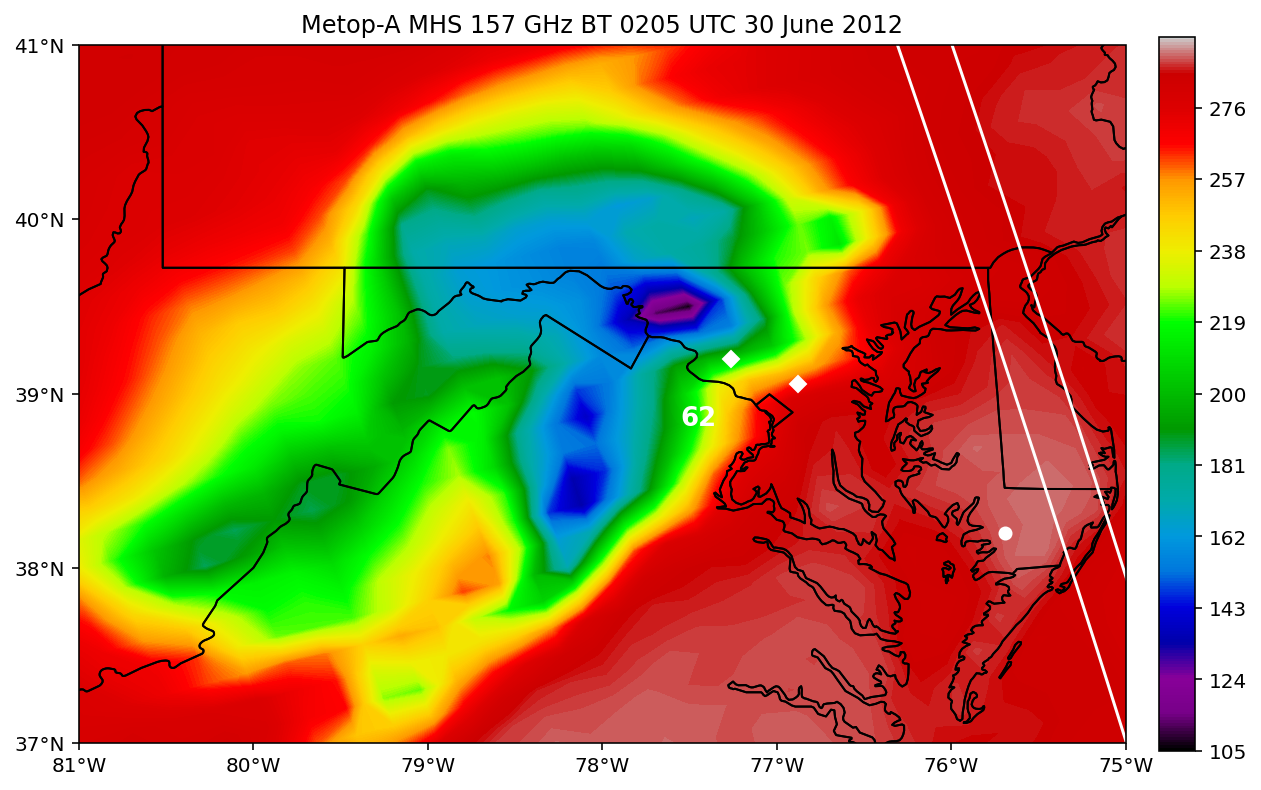

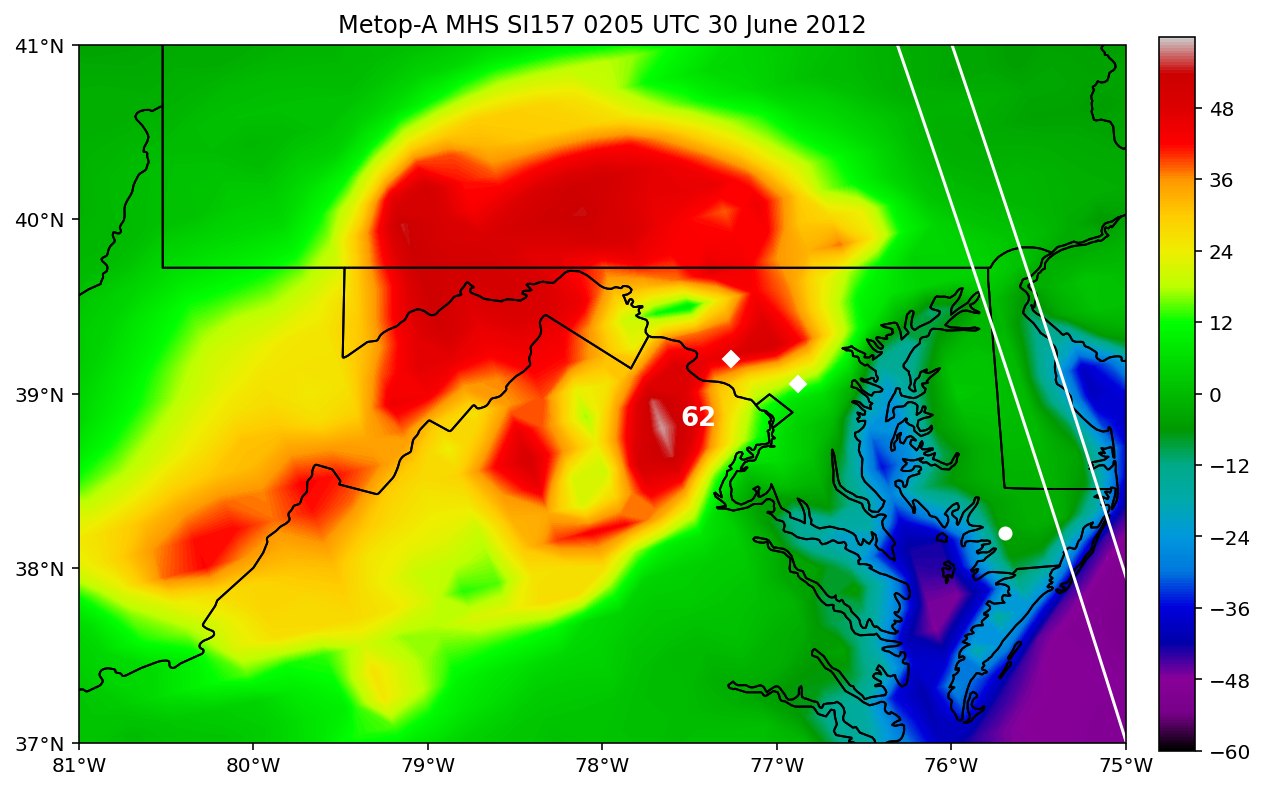

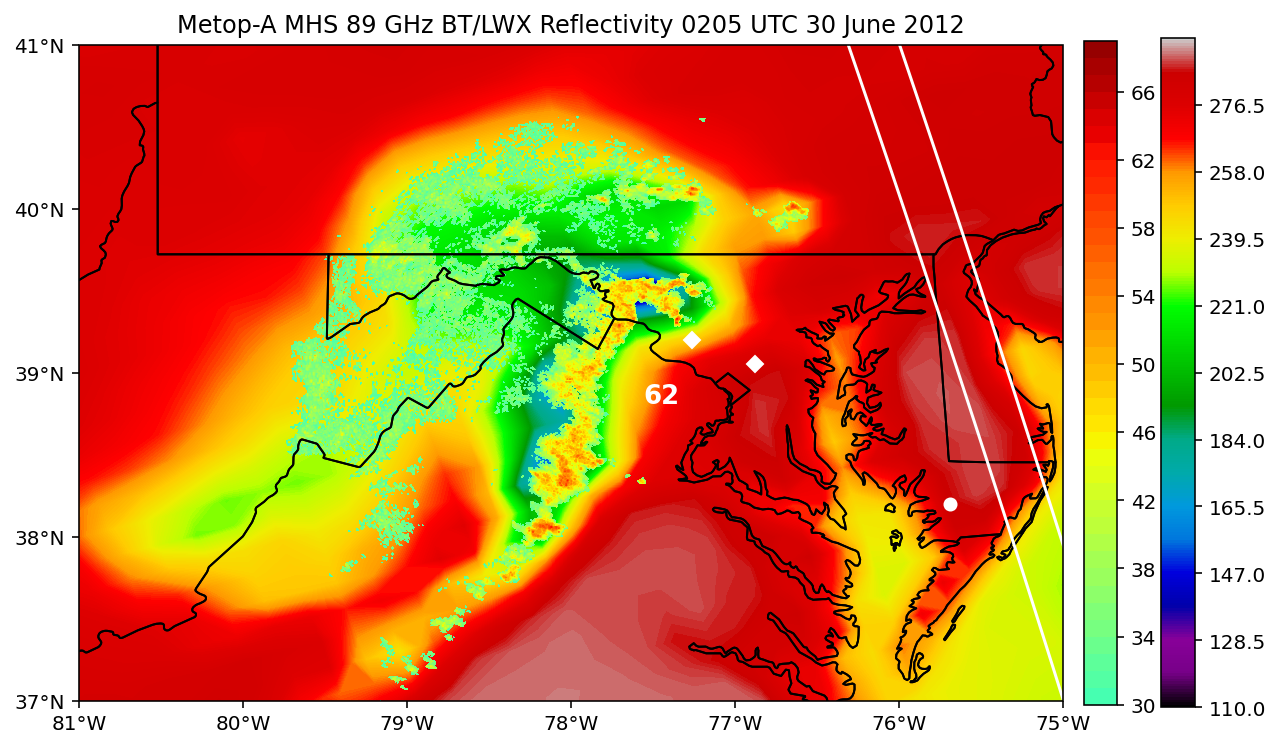

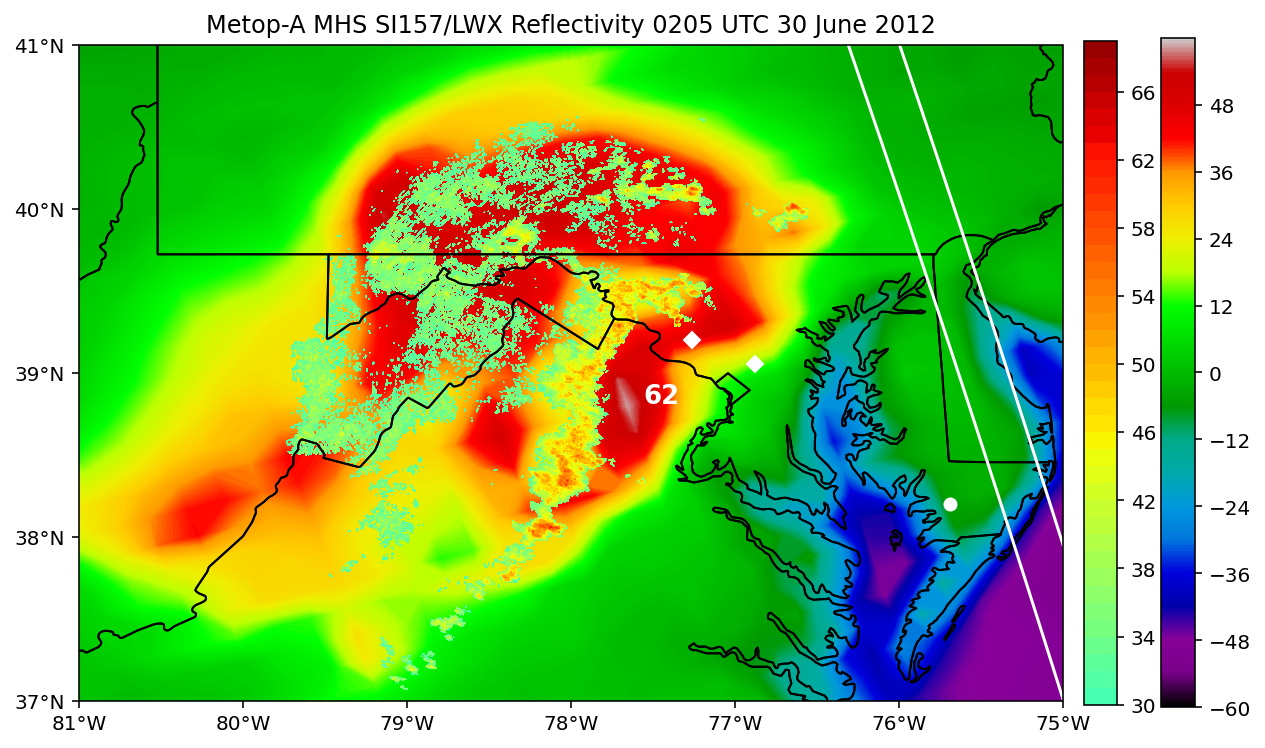

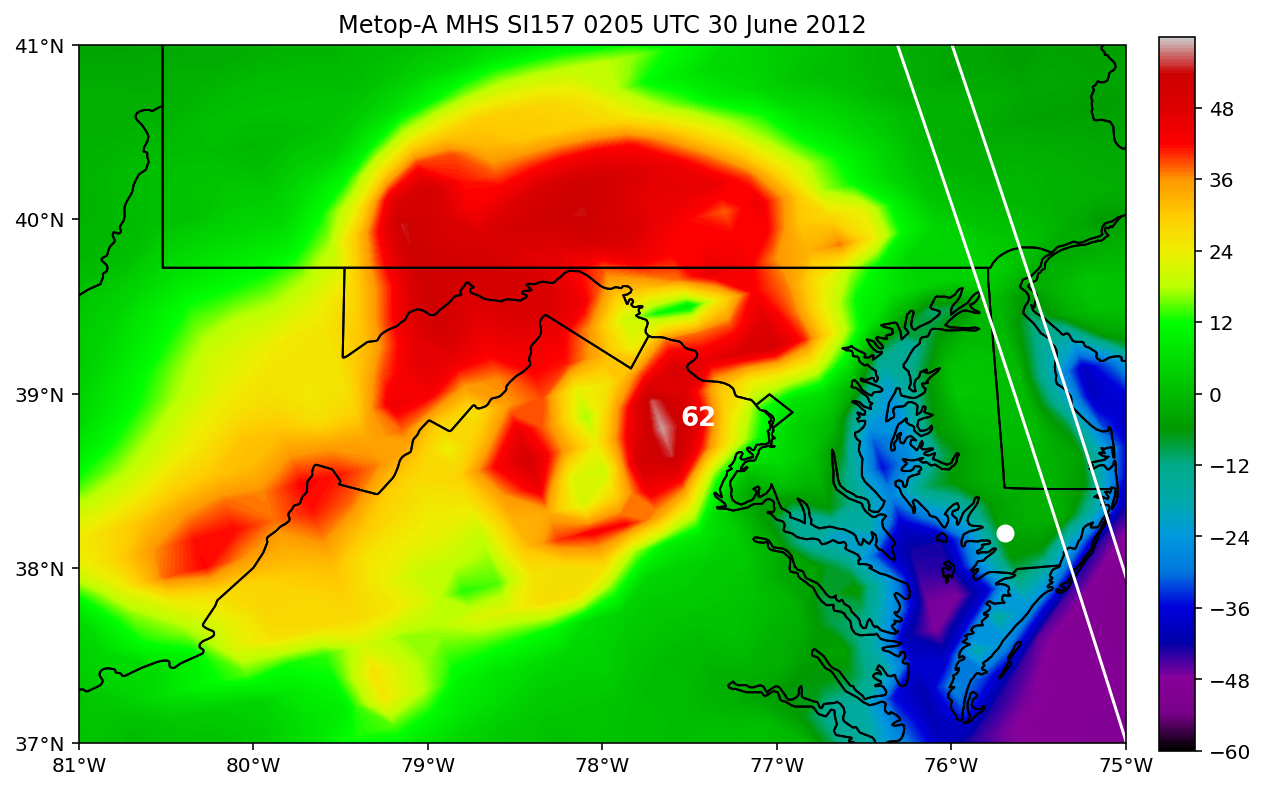

In [4]:
fig = plt.figure(figsize=(10, 10))
img_extent = (-81, -75, 37, 41)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-81, -75, 37, 41], crs.PlateCarree(globe=None))
plt.title('Metop-A MHS 89 GHz BT 0205 UTC 30 June 2012')

SZlevels = np.arange(0,2,1)
csz1 = ax.contour(lons,lats,SZ_5,SZlevels,colors='white',extent=img_extent, transform=crs.PlateCarree(globe=None))
Tlevels = np.arange(110,295,0.05)
cbtd = ax.contourf(lons,lats,BT1,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')

ax.set_xticks([-81,-80,-79,-78,-77,-76,-75])
ax.set_yticks([37,38,39,40,41])
ax.plot(-77.262667, 39.200667, 'Dw', markersize=6, transform=crs.Geodetic())
ax.plot(-76.87830, 39.05530, 'Dw', markersize=6, transform=crs.Geodetic())
ax.plot(-75.69, 38.2, 'ow', markersize=6, transform=crs.Geodetic())
ax.text(-77.44750, 38.93472, '62', color='white', weight='bold', fontsize=13, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)

plt.savefig("mhs_89T_0205.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-81, -75, 37, 41)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-81, -75, 37, 41], crs.PlateCarree(globe=None))
plt.title('Metop-A MHS 157 GHz BT 0205 UTC 30 June 2012')

SZlevels = np.arange(0,2,1)
csz1 = ax.contour(lons,lats,SZ_5,SZlevels,extent=img_extent,colors='white',transform=crs.PlateCarree(globe=None))
Tlevels = np.arange(105,295,0.05)
cbtd = ax.contourf(lons,lats,BT2,Tlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')

ax.set_xticks([-81,-80,-79,-78,-77,-76,-75])
ax.set_yticks([37,38,39,40,41])
ax.plot(-77.262667, 39.200667, 'Dw', markersize=6, transform=crs.Geodetic())
ax.plot(-76.87830, 39.05530, 'Dw', markersize=6, transform=crs.Geodetic())
ax.plot(-75.69, 38.2, 'ow', markersize=6, transform=crs.Geodetic())
ax.text(-77.44750, 38.93472, '62', color='white', weight='bold', fontsize=13, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)

plt.savefig("mhs_157T_0205.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-81, -75, 37, 41)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-81, -75, 37, 41], crs.PlateCarree(globe=None))
plt.title('Metop-A MHS SI157 0205 UTC 30 June 2012')

SZlevels = np.arange(0,2,1)
csz1 = ax.contour(lons,lats,SZ_5,SZlevels,extent=img_extent,colors='white',transform=crs.PlateCarree(globe=None))
Tlevels = np.arange(-60,60,0.05)
cbtd = ax.contourf(lons,lats,BTD,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')

ax.set_xticks([-81,-80,-79,-78,-77,-76,-75])
ax.set_yticks([37,38,39,40,41])
ax.plot(-77.262667, 39.200667, 'Dw', markersize=6, transform=crs.Geodetic())
ax.plot(-76.87830, 39.05530, 'Dw', markersize=6, transform=crs.Geodetic())
ax.plot(-75.69, 38.2, 'ow', markersize=6, transform=crs.Geodetic())
ax.text(-77.44750, 38.93472, '62', color='white', weight='bold', fontsize=13, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)

plt.savefig("mhs_SI157_0205.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-81, -75, 37, 41)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-81, -75, 37, 41], crs.PlateCarree(globe=None))
plt.title('Metop-A MHS 89 GHz BT/LWX Reflectivity 0205 UTC 30 June 2012')

SZlevels = np.arange(0,2,1)
csz1 = ax.contour(lons,lats,SZ_5,SZlevels,colors='white',extent=img_extent, transform=crs.PlateCarree(globe=None))
Tlevels = np.arange(110,295,0.05)
cbtd = ax.contourf(lons,lats,BT1,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')
Zlevels = np.arange(30,70,1)
cZ1 = ax.contourf(lonz_lwx,latz_lwx,Z_30_LWX,Zlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet',vmin=0,vmax=70)

ax.set_xticks([-81,-80,-79,-78,-77,-76,-75])
ax.set_yticks([37,38,39,40,41])
ax.plot(-77.262667, 39.200667, 'Dw', markersize=6, transform=crs.Geodetic())
ax.plot(-76.87830, 39.05530, 'Dw', markersize=6, transform=crs.Geodetic())
ax.plot(-75.69, 38.2, 'ow', markersize=6, transform=crs.Geodetic())
ax.text(-77.44750, 38.93472, '62', color='white', weight='bold', fontsize=13, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar1=plt.colorbar(cbtd,fraction=0.03,pad=0.04)
cbar2=plt.colorbar(cZ1,fraction=0.032,pad=0.02)

plt.savefig("mhs_89T_Z_0205.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-81, -75, 37, 41)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-81, -75, 37, 41], crs.PlateCarree(globe=None))
plt.title('Metop-A MHS SI157/LWX Reflectivity 0205 UTC 30 June 2012')

SZlevels = np.arange(0,2,1)
csz1 = ax.contour(lons,lats,SZ_5,SZlevels,extent=img_extent,colors='white',transform=crs.PlateCarree(globe=None))
Tlevels = np.arange(-60,60,0.05)
cbtd = ax.contourf(lons,lats,BTD,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')
Zlevels = np.arange(30,70,1)
cZ1 = ax.contourf(lonz_lwx,latz_lwx,Z_30_LWX,Zlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet',vmin=0,vmax=70)

ax.set_xticks([-81,-80,-79,-78,-77,-76,-75])
ax.set_yticks([37,38,39,40,41])
ax.plot(-77.262667, 39.200667, 'Dw', markersize=6, transform=crs.Geodetic())
ax.plot(-76.87830, 39.05530, 'Dw', markersize=6, transform=crs.Geodetic())
ax.plot(-75.69, 38.2, 'ow', markersize=6, transform=crs.Geodetic())
ax.text(-77.44750, 38.93472, '62', color='white', weight='bold', fontsize=13, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar1=plt.colorbar(cbtd,fraction=0.03,pad=0.04)
cbar2=plt.colorbar(cZ1,fraction=0.032,pad=0.02)

plt.savefig("mhs_SI157_Z_0205.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 8))
img_extent = (-81, -75, 37, 41)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-81, -75, 37, 41], crs.PlateCarree(globe=None))
plt.title('Metop-A MHS SI157 0205 UTC 30 June 2012')

SZlevels = np.arange(0,2,1)
csz1 = ax.contour(lons,lats,SZ_5,SZlevels,extent=img_extent,colors='white',transform=crs.PlateCarree(globe=None))
Tlevels = np.arange(-60,60,0.05)
cbtd = ax.contourf(lons,lats,BTD,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')

ax.set_xticks([-81,-80,-79,-78,-77,-76,-75])
ax.set_yticks([37,38,39,40,41])
ax.plot(-75.69, 38.2, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.44750, 38.93472, '62', color='white', weight='bold', fontsize=13, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)

plt.savefig("mhs_SI157_0205_ret.png",dpi=250,bbox_inches='tight')
plt.show()